In [11]:
%cd AtomicImageSimulator/
from main import *

import numpy as np
import os, re
import sys
import pandas as pd
import glob
import matplotlib.pyplot as plt
import pickle
import atomai as aoi
np.random.seed(0)
from processing import *

import torch
torch.set_default_device("cuda")

[Errno 2] No such file or directory: 'AtomicImageSimulator/'
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/AtomicImageSimulator


In [2]:
directory = "/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/"

ind_to_val, image_list, mask_list, label_list = xdatcar_processor(directory, n_sims=25)

{0: '5', 1: None, 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}


{0: '5', 1: '25', 2: None, 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: None, 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: None, 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '23', 5: None, 6: None, 7: None, 8: None, 9: None, 10: None, 11: None, 12: None, 13: None, 14: None, 15: None, 16: None, 17: None, 18: None, 19: None, 20: None, 21: None, 22: None, 23: None, 24: None}
{0: '5', 1: '25', 2: '20', 3: '14', 4: '

In [ ]:
!mkdir results/
!mkdir results/data_for_plot_generations
!mkdir results/single_tasks
!mkdir results/single_tasks/gradient_plot
!mkdir results/single_tasks/model
!mkdir results/single_tasks/reconstruction_graphs
!mkdir results/single_tasks/training_loss
!mkdir results/single_tasks/active_learning

Text(0.5, 1.0, 'Mask_S_XDATCAR_df_S_23')

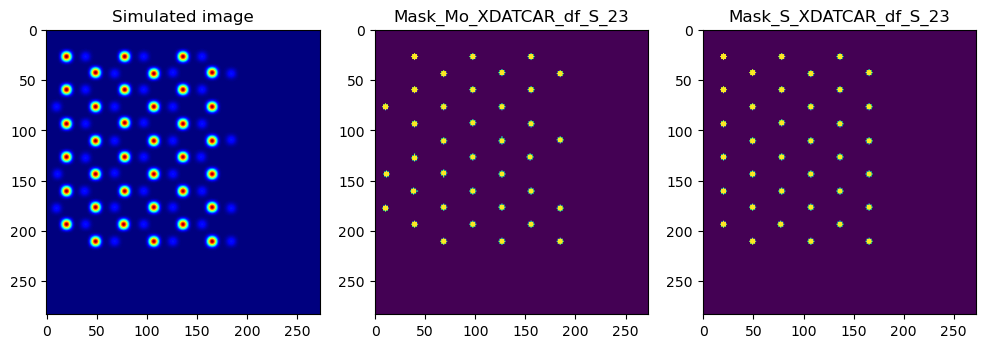

In [3]:
#plot image from the lists of image-mask pairs
temp_id = 4
_, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 6))
ax1.imshow(image_list[temp_id][1], cmap = 'jet')
ax2.imshow(mask_list[temp_id][1][:,:,0])
ax3.imshow(mask_list[temp_id][1][:,:,1])
ax1.set_title("Simulated image")
ax2.set_title("Mask_Mo_" + label_list[temp_id])
ax3.set_title("Mask_S_" + label_list[temp_id])

In [4]:
#crop out the empty spaces
cropped_image_list = []
cropped_mask_list = []

for i in range(0,len(image_list)):
  local_cropped_imglist = []
  local_cropped_masklist = []
  for j in range(0,len(image_list[i])):
    local_cropped_imglist.append(image_list[i][j][:208,0:208])
    local_cropped_masklist.append(mask_list[i][j][:208,0:208])

  cropped_image_list.append(local_cropped_imglist)
  cropped_mask_list.append(local_cropped_masklist)

print("Number of tasks : ",len(cropped_image_list))
np.shape(cropped_image_list[0])

Number of tasks :  25


(228, 208, 208)

Augmentations

In [5]:
image_mask = {val:(None,None) for val in range(25)}

for val in range(25):
    image_mask[val] = augmented_simulations(cropped_image_list[val],cropped_mask_list[val])

No Augmentations

In [6]:
image_nonaug = {val:(None,None) for val in range(25)}

for val in range(25):
    image_nonaug[val] = np.array(cropped_image_list[val]),np.array(cropped_mask_list[val])

In [7]:
import torch
model_reptile = torch.load("/lustre/saranath/Techcon24/AIMD/Sim2Experiment/reptile.pt")
model_reptile.float()

fcFeatureExtractor(
  (linear1): Linear(in_features=256, out_features=1000, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=1000, out_features=500, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=500, out_features=50, bias=True)
  (relu3): ReLU()
  (linear4): Linear(in_features=50, out_features=2, bias=True)
)

In [8]:
val = 0
energy_to_ind = {val:None for val in range(25)}
directory =  f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/"
for filename in os.listdir(directory):
  if "." in filename:
    continue
  task = ind_to_val[val]
  file_name = directory + filename + "/"
  
  # filepath = f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/df_{task}/"
  xdatcar_filepath = f"XDATCAR_df_S_{filename.split('_')[1]}"
  oszicar_filepath = f"OSZICAR_df_S_{filename.split('_')[1]}"
  print(file_name)
  energy_to_ind[val] = oszicar_generation(file_name,xdatcar_filepath,oszicar_filepath,filename.split("_")[1])
  val += 1

/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_5/
Total number of atoms: 103
Last trajectory Number: 2280.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_25/
Total number of atoms: 83
Last trajectory Number: 2420.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_20/
Total number of atoms: 88
Last trajectory Number: 2480.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_14/
Total number of atoms: 94
Last trajectory Number: 2380.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_23/
Total number of atoms: 85
Last trajectory Number: 2400.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_19/
Total number of atoms: 89
Last trajectory Number: 2460.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_6/
Total number of atoms: 102
Last trajectory Number: 2150.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_15/
Total num

/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_2/
Total number of atoms: 106
Last trajectory Number: 2020.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_18/
Total number of atoms: 90
Last trajectory Number: 2460.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_4/
Total number of atoms: 104
Last trajectory Number: 1990.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_9/
Total number of atoms: 99
Last trajectory Number: 2270.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_16/
Total number of atoms: 92
Last trajectory Number: 2410.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_24/
Total number of atoms: 84
Last trajectory Number: 2590.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_1/
Total number of atoms: 107
Last trajectory Number: 1960.0
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/to_share_HP_defects/df_21/
Total numb

In [27]:
energy_to_ind[i]["Reference_Energy"]//energy_to_ind[i]["Reference_Energy_per_atom"]

0      108.0
1      108.0
2      108.0
3      108.0
4      108.0
       ...  
222    108.0
223    108.0
224    108.0
225    108.0
226    108.0
Length: 227, dtype: float64

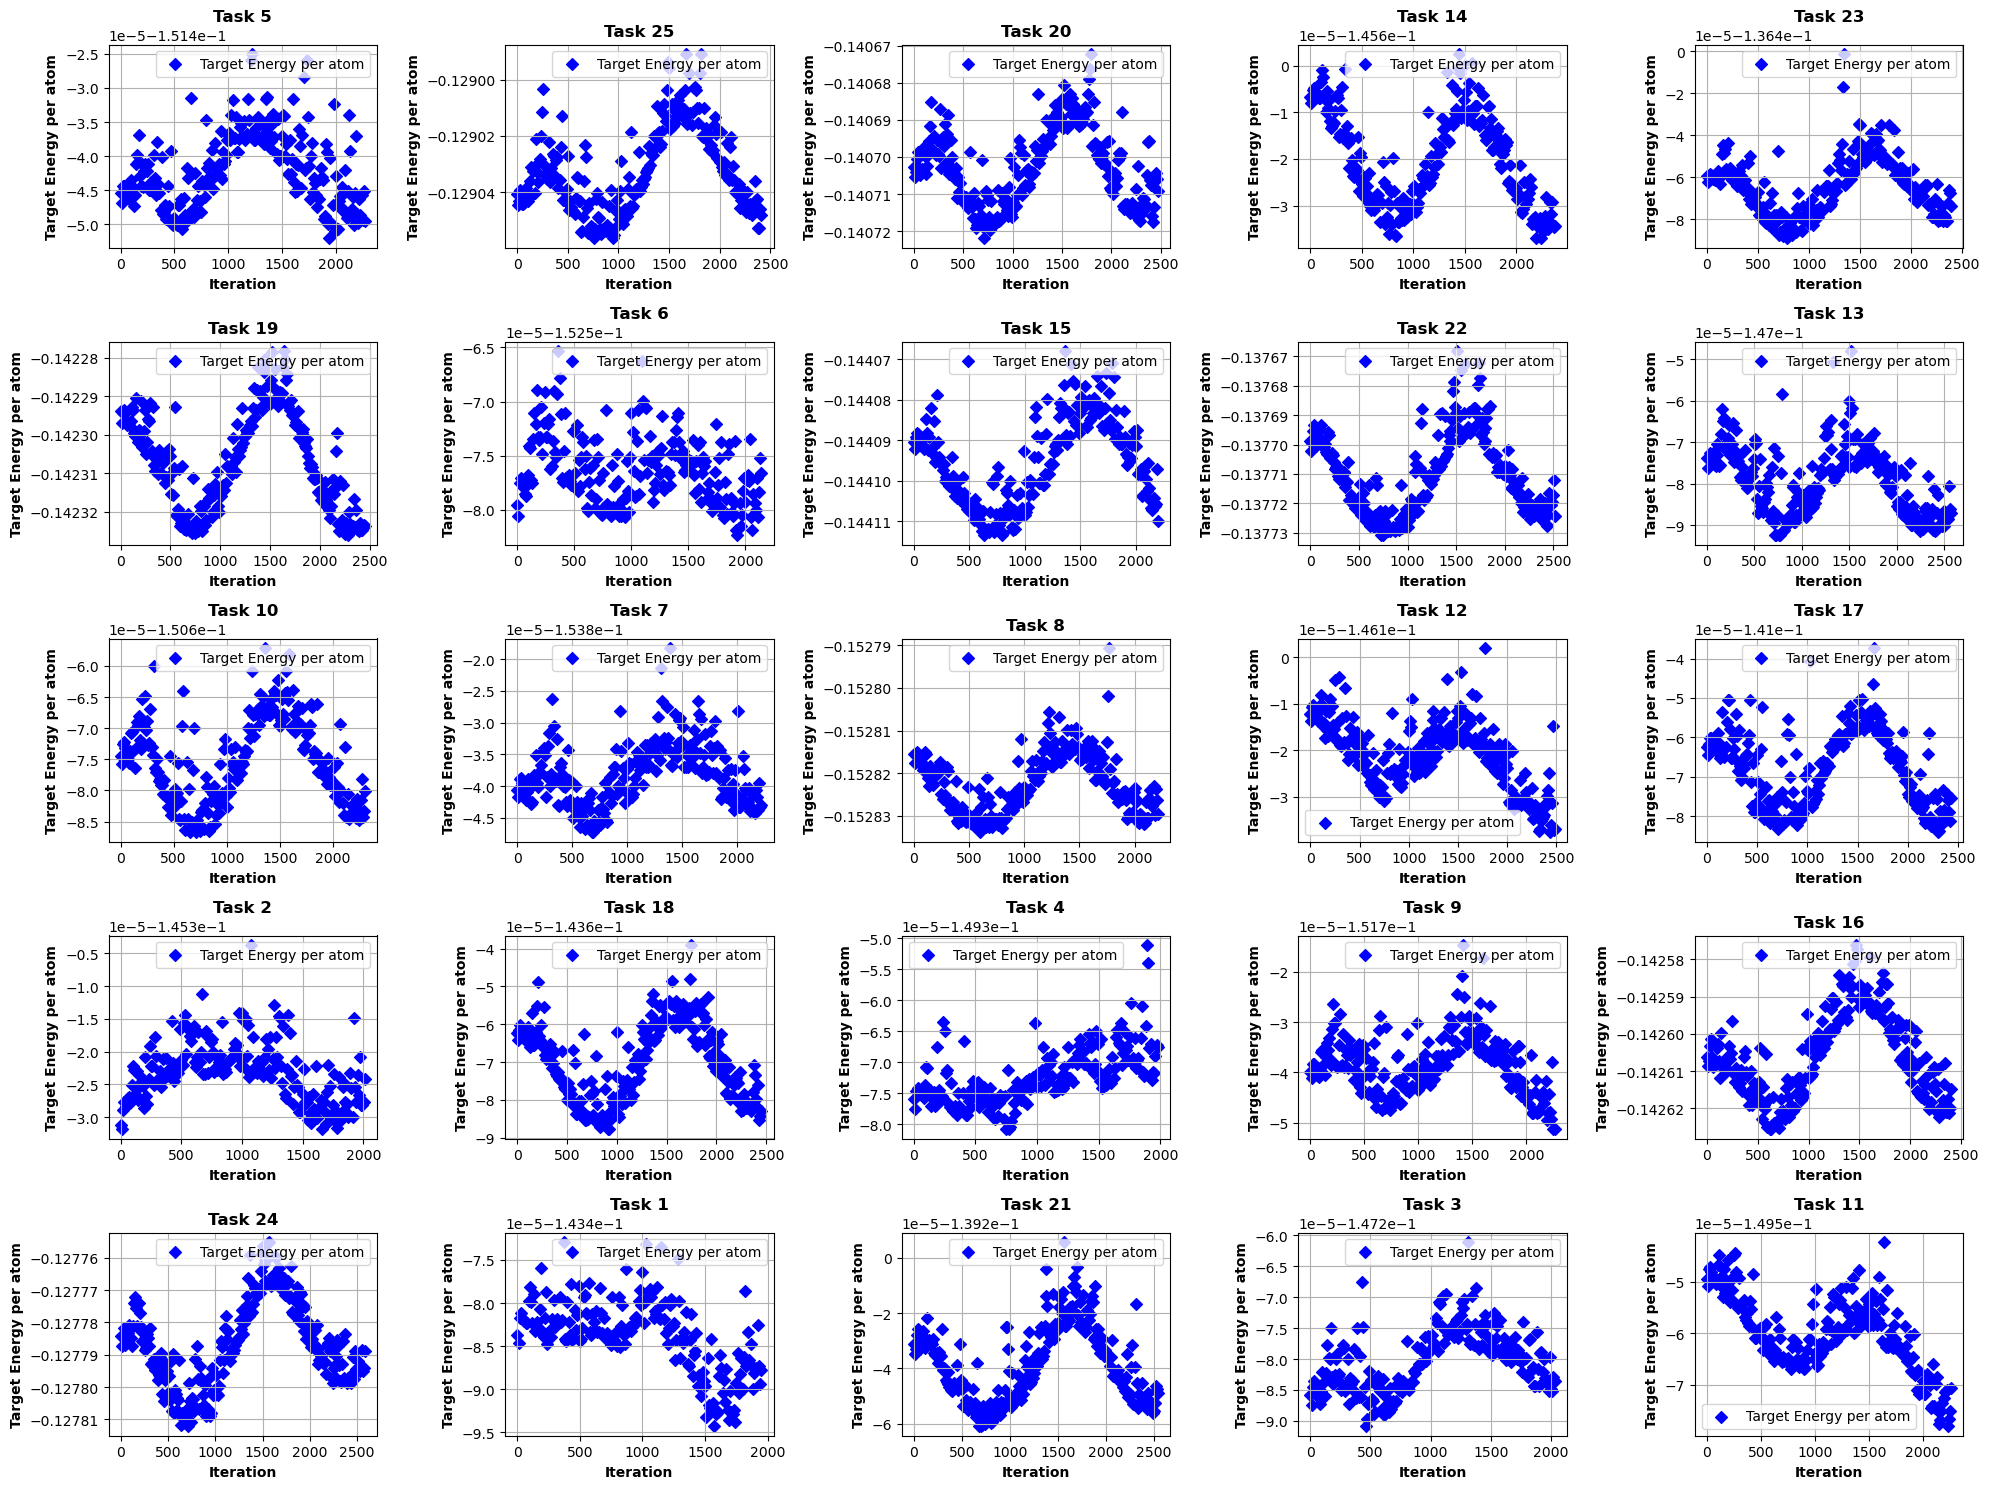

In [9]:
# Create a 5x5 grid of subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 15), dpi=100)

# Flatten the 2D array of axes to easily iterate over them
axs = axs.flatten()

# Loop through each task and its corresponding subplot
for i in range(25):
    ax = axs[i]
    ax.scatter(energy_to_ind[i]['Iteration'], energy_to_ind[i]['target_total_energy_per_atom'], label='Target Energy per atom', color='blue', marker='D')
    
    # Adding labels and title with font settings
    ax.set_xlabel('Iteration', fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.set_ylabel('Target Energy per atom', fontdict={'fontsize': 10, 'fontweight': 'bold'})
    ax.set_title(f'Task {ind_to_val[i]}', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    ax.legend()
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Full Training - Individual Tasks

In [10]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

With Normal Feature Extractor and without Scaling

In [41]:
def reconstruction_graph_plot(iterations_train,train_mean,y_train,iterations_test,mean,y_test,ind_to_val,title,task,scaler_flag,feature_extractor,training_cycles,lr):
    plt.figure(figsize=(20,7))
    plt.scatter(np.array(iterations_train)[-50:],train_mean[-50:],c='r',marker="+",label="Train prediction")
    plt.scatter(np.array(iterations_train)[-50:],y_train.reshape(-1,1)[-50:],c='b',marker="+",label="Train ground_truth")
    plt.scatter(np.array(iterations_test),mean.reshape(1,-1),c='r',label="prediction")
    plt.scatter(np.array(iterations_test),y_test.reshape(1,-1),c='b',label="ground_truth")
    plt.title(f"{title} from Task {ind_to_val[task]}",fontsize=20)
    plt.xlabel("Iterations")
    plt.ylabel("Target Energy")
    plt.legend(fontsize=10)
    plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/reconstruction_graphs/Task{ind_to_val[task]}_Norm{scaler_flag}_{feature_extractor}_training{training_cycles}_lr{lr}_reconstruction.png")
    plt.clf()

def single_model_training_and_validation(train_tasks,ind_to_val,image_mask,energy_to_ind,title,**kwargs):
    datadim = kwargs.get("datadim", 43264)
    embedim = 2
    training_cycles = kwargs.get("training_cycles", 150)
    lr = kwargs.get("lr", 1e-2)
    scaler_flag = kwargs.get("scaler",False)
    results = {int(ind_to_val[task]):[] for task in train_tasks}
    feature_extractor = kwargs.get("reptile","default_FE")
    print(feature_extractor)
    model_sample = torch.nn.Sequential(
                                torch.nn.Linear(datadim,2048),
                                torch.nn.ReLU(),
                                # torch.nn.Linear(10240,2048),
                                # torch.nn.ReLU(),
                                torch.nn.Linear(2048,1024),
                                torch.nn.ReLU(),
                                torch.nn.Linear(1024, 256),
                                torch.nn.ReLU(),
                                *(list(fcFeatureExtractor(256,embedim).children())),)

    model_mod = kwargs.get("model_mod",model_sample)

    for task in train_tasks:
        print(f"Training Task {ind_to_val[task]}")
        (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
            image_mask[task][0], energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.15, shuffle=False, random_state=2)
        # X_train, y_train = image_mask[0][0], energy_to_ind[0]["target_energy"]
        X_train = np.squeeze(X_train,axis=1)
        X_test = np.squeeze(X_test,axis=1)

        s1,s2,s3 = X_train.shape
        X_train = X_train.reshape(-1,s2*s3)
        X_test = X_test.reshape(-1,s2*s3)


        y_train = np.array(y_train).reshape(1,-1)
        y_test = np.array(y_test).reshape(1,-1) 

        if scaler_flag:
            X_train = scaler_fun.fit_transform(X_train)
            X_test = scaler_fun.fit_transform(X_test)
        
        X , y = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
        y = y.reshape(1,-1)    

        dklgp = dklgpreg.dklGPR(datadim,embedim,hidden_dim=[1000,500,50],feature_extract=copy.deepcopy(model_mod),precision="single")#aoi.models.dklGPR(data_dim, embedim=2, precision="double")
        dklgp.fit(X, y, training_cycles=training_cycles, lr=lr)

        training_loss = list(dklgp.train_loss)
        
        with torch.no_grad():
            train_mean, train_var = dklgp.predict(X)
            mean, var = dklgp.predict(X_test)
        
        torch.save(dklgp,f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/model/Task{ind_to_val[task]}_Norm{scaler_flag}_{feature_extractor}_training{training_cycles}_lr{lr}_model.pt")
        clear_gpu_cache()

        reconstruction_graph_plot(iterations_train,train_mean,y_train,iterations_test,mean,y_test,ind_to_val,title,task,scaler_flag,feature_extractor,training_cycles,lr)

        distribution_plotting(y_test.reshape(-1,1),mean.reshape(-1,1),ind_to_val[task],feature_extractor,scaler_flag)
        results[int(ind_to_val[task])] = [iterations_train,iterations_test,train_mean,mean,y_train,y_test,feature_extractor,training_loss,scaler_flag,ind_to_val,title,training_cycles,lr]
    return results

In [12]:
datadim = 43264
embedim = 2 
training_cycles = 20
n_tasks = 25
lr = 1e-1
########### NOT USING THE BELOW FOR THIS AS IT IS DEFAULT RUN ################
'''

reptile = 'Reptile'

model_mod = torch.nn.Sequential(
                            torch.nn.Linear(datadim,2048),
                            torch.nn.ReLU(),
                            # torch.nn.Linear(10240,2048),
                            # torch.nn.ReLU(),
                            torch.nn.Linear(2048,1024),
                            torch.nn.ReLU(),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            *(list(model_reptile.children())),)

scaler = False
'''

train_tasks, test_tasks = sequential_train_and_test_task(n_tasks,ind_to_val)
title = "Default Feature Extractor without scaling, Sequential tasks \n Reconstruction Graph"

results = single_model_training_and_validation(train_tasks,ind_to_val,image_mask,energy_to_ind,title,training_cycles=training_cycles,datadim=datadim,lr=lr)
np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Data_defaultFE_noScaling.npy",results)

default_FE
Training Task 1
dtype : torch.float32


Training Task 2
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 3
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 4
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 5
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 6
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 7
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/processing.py:550: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.te

Training Task 8
dtype : torch.float32
Training Task 9
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 10
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 11
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 12
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 13
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 14
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 15
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 16
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 17
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 18
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Training Task 19
dtype : torch.float32


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

With Default Feature Extractor, Scaling

In [12]:
datadim = 43264
embedim = 2 
training_cycles = 20
n_tasks = 25
lr = 1e-1
########### NOT USING THE BELOW FOR THIS AS IT IS DEFAULT RUN ################
'''

reptile = 'Reptile'

model_mod = torch.nn.Sequential(
                            torch.nn.Linear(datadim,2048),
                            torch.nn.ReLU(),
                            # torch.nn.Linear(10240,2048),
                            # torch.nn.ReLU(),
                            torch.nn.Linear(2048,1024),
                            torch.nn.ReLU(),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            *(list(model_reptile.children())),)


'''
scaler = True

train_tasks, test_tasks = sequential_train_and_test_task(n_tasks,ind_to_val)
title = "Default Feature Extractor without scaling, Sequential tasks \n Reconstruction Graph"

results = single_model_training_and_validation(train_tasks,ind_to_val,image_mask,energy_to_ind,title,training_cycles=training_cycles,datadim=datadim,lr=lr,scaler=scaler)
np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Data_defaultFE_withScaling.npy",results)

default_FE
Training Task 1
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 2
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 3
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 4
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 5
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 6
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 7
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))
/lustre/saranath/Techcon24/AIMD/Sim2Experiment/processing.py:549: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


Training Task 8
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 9
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 10
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 11
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 12
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 13
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 14
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 15
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 16
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 17
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 18
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


Training Task 19
dtype : torch.float32


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/gptrain.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mse_loss = self.mse(torch.tensor(output.mean),torch.tensor(y))


<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

## For Reconstrcution Plot generations:

1. Stability Acquisition
2. Uncertainty Acquisition

In [16]:
global fig
fig = None
from statistics import mean 

    
def plot_images_by_indices(images, indices, true_labels, iteration, task_id, exp_step, acquisition, cols=5):
    """Plot images corresponding to the specified indices."""
    num_images = len(images)
    rows = num_images // cols + (1 if num_images % cols else 0)

    fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, 5))

    for idx in range(num_images):
      img_ax = plt.subplot(rows, cols, idx+1)
      img_ax.imshow(images[idx][0].cpu().numpy())
      img_ax.set_title(f"Iteration: {iteration[indices[idx]]}",fontsize=30)
      img_ax.axis('off')

    '''
    scatter_ax = axs[cols-1]
    scatter_ax.set_title('Energy at Optimal Iteration Plot - Active Learning Exploration')
    scatter_ax.set_xlabel('Iteration')
    scatter_ax.set_ylabel('Energy')
    for index in indices:
      scatter_ax.scatter(iteration[index], true_labels[index], color='red', s=100, marker=f"${int(iteration[index])}$")  # Increase marker size with `s`
    '''
    plt.tight_layout()
    plt.savefig(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/AL_selected_Simulated_images/task{task_id+1}/selected_exp{exp_step}_with_{acquisition}acq_trajectory.png")
    plt.clf()


def active_learning_single_tasks(task,image_mask,energy_to_ind,exploration_steps,acquisition):

    (X_train, X_test, y_train, y_test, iterations_train, iterations_test) = train_test_split(
                image_mask[task][0], energy_to_ind[task]["target_total_energy_per_atom"], energy_to_ind[task]['Iteration'], test_size=0.9, shuffle=False, random_state=2)

    datadim = 43264
    embedim = 2 
    num_iterations = exploration_steps
    num_samples_per_iteration = 1

    training_cycles = 20
    lr = 1e-1

    unlabeled_img = torch.tensor(copy.deepcopy(X_test),dtype=torch.float32)

    X_train = np.squeeze(X_train,axis=1)
    X_test = np.squeeze(X_test,axis=1)

    s1,s2,s3 = X_train.shape
    X_train = X_train.reshape(-1,s2*s3)
    X_test = X_test.reshape(-1,s2*s3)

    y_train = np.array(y_train).reshape(1,-1)
    y_test = np.array(y_test).reshape(1,-1)

    true_labels = energy_to_ind[task]['target_total_energy_per_atom'] 

    train_x = torch.tensor(X_train, dtype = torch.float32)
    train_y = torch.tensor(np.array(y_train), dtype = torch.float32)
    test_x = torch.tensor(X_test, dtype = torch.float32)
    test_y = torch.tensor(np.array(y_test), dtype = torch.float32)

    target_labels = torch.tensor(np.array(energy_to_ind[task]['target_total_energy_per_atom'][iterations_test.index]),dtype=torch.float32)

    iterations_train = torch.tensor(np.array(iterations_train),dtype=torch.float32)
    iterations_test = torch.tensor(np.array(iterations_test),dtype=torch.float32)

    print(f"True labels shape: {true_labels.shape}")
    print(f"True labels indices: {true_labels.index}")

    acquisiton_function = {
        "uncertainty": select_most_uncertain_samples,
        "stability" : select_most_stable_energy_samples,
    }

    selected_iter = []
    selected_energy = []
    training_loss = []
    model_mod = torch.nn.Sequential(
                                    torch.nn.Linear(datadim,2048),
                                    torch.nn.ReLU(),
                                    # torch.nn.Linear(10240,2048),
                                    # torch.nn.ReLU(),
                                    torch.nn.Linear(2048,1024),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(1024, 256),
                                    torch.nn.ReLU(),
                                    *(list(fcFeatureExtractor(256,embedim).children())),)

    dklgp = dklgpreg.dklGPR(datadim,embedim,hidden_dim=[1000,500,50],feature_extract=copy.deepcopy(model_mod),precision="single")#aoi.models.dklGPR(data_dim, embedim=2, precision="double")

    for iteration in range(num_iterations):

        print(f"Iteration {iteration+1}/{num_iterations}")
        
        dklgp.fit(train_x, train_y, training_cycles=training_cycles, lr=lr)

        training_loss.append(mean(list(dklgp.train_loss)))

        #most_uncertain_index = select_most_uncertain_samples(dklgp, test_x, num_samples=num_samples_per_iteration)
        most_uncertain_index = acquisiton_function[acquisition](dklgp, test_x, test_y, num_samples=num_samples_per_iteration, error_threshold=0.05)
        print(f"Most uncertain indices: {most_uncertain_index}")

        unlabelled_images = [unlabeled_img[i] for i in most_uncertain_index]

        selected_iter.append(iterations_test[most_uncertain_index.cpu().numpy()].cpu().numpy())
        selected_energy.append(target_labels[most_uncertain_index.cpu().numpy()].cpu().numpy())

        plot_images_by_indices(unlabelled_images, most_uncertain_index.cpu().numpy(), target_labels.cpu().numpy(), iterations_test.cpu().numpy(), task, iteration, acquisition, cols=num_samples_per_iteration)

        train_x = torch.cat((train_x, test_x[most_uncertain_index.item()][None]), 0)
        train_y = torch.cat((train_y, test_y[:,most_uncertain_index.item()].reshape(1,-1)), 1)
        
        test_x = torch.cat((test_x[:most_uncertain_index.item()], test_x[most_uncertain_index.item()+1:]), 0)
        test_y = torch.cat((test_y[:,:most_uncertain_index.item()].reshape(1,-1), test_y[:,most_uncertain_index.item()+1:].reshape(1,-1)), 1)
        
        unlabeled_img = torch.cat((unlabeled_img[:most_uncertain_index.item()], unlabeled_img[most_uncertain_index.item()+1:]), 0)
        target_labels = torch.cat((target_labels[:most_uncertain_index.item()], target_labels[most_uncertain_index.item()+1:]), 0)
        
        iterations_test = torch.cat((iterations_test[:most_uncertain_index.item()], iterations_test[most_uncertain_index.item()+1:]), 0)


        print(f"New data shape: {train_x.shape}")
        print(f"New data label: {train_y.shape}")
        torch.save(dklgp,f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/single_tasks/active_learning/task{task+1}/AL_exp{iteration}_with_{acquisition}_acq_model.pt")
    
    plot_selected_points(iterations_test,test_y,selected_iter,selected_energy,acquisition,task, num_iterations)

    return selected_energy, selected_iter, training_loss, iterations_test,test_y, acquisition,task, num_iterations


Stability Acquisition

In [12]:
clear_gpu_cache()
torch.set_default_device("cuda:0")

In [13]:
n_tasks = 25
exploration_steps = 10
acquisition = "stability"
train_tasks, test_tasks = sequential_train_and_test_task(n_tasks, ind_to_val)
total_tasks = train_tasks+test_tasks
print(total_tasks)
results = {int(ind_to_val[task])-1:[] for task in total_tasks}
for task in total_tasks:
    task_num = int(ind_to_val[task])-1
    print(task_num)
    results[task_num] = active_learning_single_tasks(task_num,image_mask,energy_to_ind,exploration_steps,acquisition)
    clear_gpu_cache()

np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Active_learning_data_stability_25tasks.npy",results)

[21, 15, 23, 17, 0, 6, 11, 12, 18, 10, 24, 13, 9, 3, 7, 19, 14, 16, 5, 2, 22, 8, 4, 20, 1]
0
True labels shape: (228,)
True labels indices: RangeIndex(start=0, stop=228, step=1)


dtype : torch.float32
Iteration 1/10
tensor([27], device='cpu')
Most uncertain indices: tensor([27], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([94], device='cpu')
Most uncertain indices: tensor([94], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([50], device='cpu')
Most uncertain indices: tensor([50], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([54], device='cpu')
Most uncertain indices: tensor([54], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([177], device='cpu')
Most uncertain indices: tensor([177], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([125], device='cpu')
Most uncertain indices: tensor([125], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([149], device='cpu')
Most uncertain indices: tensor([149], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([98], device='cpu')
Most uncertain indices: tensor([98], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([167], device='cpu')
Most uncertain indices: tensor([167], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([176], device='cpu')
Most uncertain indices: tensor([176], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
1
True labels shape: (242,)
True labels indices: RangeIndex(start=0, stop=242, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([52], device='cpu')
Most uncertain indices: tensor([52], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([70], device='cpu')
Most uncertain indices: tensor([70], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([4], device='cpu')
Most uncertain indices: tensor([4], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([139], device='cpu')
Most uncertain indices: tensor([139], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([140], device='cpu')
Most uncertain indices: tensor([140], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([181], device='cpu')
Most uncertain indices: tensor([181], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([76], device='cpu')
Most uncertain indices: tensor([76], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([144], device='cpu')
Most uncertain indices: tensor([144], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([128], device='cpu')
Most uncertain indices: tensor([128], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/processing.py:710: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, 5))


Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([100], device='cpu')
Most uncertain indices: tensor([100], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
2
True labels shape: (248,)
True labels indices: RangeIndex(start=0, stop=248, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([57], device='cpu')
Most uncertain indices: tensor([57], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([154], device='cpu')
Most uncertain indices: tensor([154], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([153], device='cpu')
Most uncertain indices: tensor([153], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([152], device='cpu')
Most uncertain indices: tensor([152], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([127], device='cpu')
Most uncertain indices: tensor([127], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([125], device='cpu')
Most uncertain indices: tensor([125], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([133], device='cpu')
Most uncertain indices: tensor([133], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([130], device='cpu')
Most uncertain indices: tensor([130], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([147], device='cpu')
Most uncertain indices: tensor([147], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([130], device='cpu')
Most uncertain indices: tensor([130], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
3
True labels shape: (238,)
True labels indices: RangeIndex(start=0, stop=238, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([59], device='cpu')
Most uncertain indices: tensor([59], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([136], device='cpu')
Most uncertain indices: tensor([136], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([150], device='cpu')
Most uncertain indices: tensor([150], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([113], device='cpu')
Most uncertain indices: tensor([113], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([129], device='cpu')
Most uncertain indices: tensor([129], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([123], device='cpu')
Most uncertain indices: tensor([123], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([119], device='cpu')
Most uncertain indices: tensor([119], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([110], device='cpu')
Most uncertain indices: tensor([110], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([151], device='cpu')
Most uncertain indices: tensor([151], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([167], device='cpu')
Most uncertain indices: tensor([167], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
4
True labels shape: (240,)
True labels indices: RangeIndex(start=0, stop=240, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([54], device='cpu')
Most uncertain indices: tensor([54], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([109], device='cpu')
Most uncertain indices: tensor([109], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([50], device='cpu')
Most uncertain indices: tensor([50], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([192], device='cpu')
Most uncertain indices: tensor([192], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([179], device='cpu')
Most uncertain indices: tensor([179], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([21], device='cpu')
Most uncertain indices: tensor([21], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([188], device='cpu')
Most uncertain indices: tensor([188], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([94], device='cpu')
Most uncertain indices: tensor([94], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([204], device='cpu')
Most uncertain indices: tensor([204], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([37], device='cpu')
Most uncertain indices: tensor([37], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
5
True labels shape: (246,)
True labels indices: RangeIndex(start=0, stop=246, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([204], device='cpu')
Most uncertain indices: tensor([204], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([140], device='cpu')
Most uncertain indices: tensor([140], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([128], device='cpu')
Most uncertain indices: tensor([128], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([121], device='cpu')
Most uncertain indices: tensor([121], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([138], device='cpu')
Most uncertain indices: tensor([138], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([121], device='cpu')
Most uncertain indices: tensor([121], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([122], device='cpu')
Most uncertain indices: tensor([122], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([114], device='cpu')
Most uncertain indices: tensor([114], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([134], device='cpu')
Most uncertain indices: tensor([134], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([126], device='cpu')
Most uncertain indices: tensor([126], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
6
True labels shape: (215,)
True labels indices: RangeIndex(start=0, stop=215, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([56], device='cpu')
Most uncertain indices: tensor([56], device='cpu')
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([152], device='cpu')
Most uncertain indices: tensor([152], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([123], device='cpu')
Most uncertain indices: tensor([123], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([7], device='cpu')
Most uncertain indices: tensor([7], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([44], device='cpu')
Most uncertain indices: tensor([44], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([135], device='cpu')
Most uncertain indices: tensor([135], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([34], device='cpu')
Most uncertain indices: tensor([34], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([12], device='cpu')
Most uncertain indices: tensor([12], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([165], device='cpu')
Most uncertain indices: tensor([165], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([184], device='cpu')
Most uncertain indices: tensor([184], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
7
True labels shape: (221,)
True labels indices: RangeIndex(start=0, stop=221, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([43], device='cpu')
Most uncertain indices: tensor([43], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([197], device='cpu')
Most uncertain indices: tensor([197], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([156], device='cpu')
Most uncertain indices: tensor([156], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([134], device='cpu')
Most uncertain indices: tensor([134], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([157], device='cpu')
Most uncertain indices: tensor([157], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([11], device='cpu')
Most uncertain indices: tensor([11], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([32], device='cpu')
Most uncertain indices: tensor([32], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([176], device='cpu')
Most uncertain indices: tensor([176], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([162], device='cpu')
Most uncertain indices: tensor([162], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([153], device='cpu')
Most uncertain indices: tensor([153], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
8
True labels shape: (252,)
True labels indices: RangeIndex(start=0, stop=252, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([63], device='cpu')
Most uncertain indices: tensor([63], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([36], device='cpu')
Most uncertain indices: tensor([36], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([108], device='cpu')
Most uncertain indices: tensor([108], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([123], device='cpu')
Most uncertain indices: tensor([123], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([113], device='cpu')
Most uncertain indices: tensor([113], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([126], device='cpu')
Most uncertain indices: tensor([126], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([137], device='cpu')
Most uncertain indices: tensor([137], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([96], device='cpu')
Most uncertain indices: tensor([96], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([170], device='cpu')
Most uncertain indices: tensor([170], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([47], device='cpu')
Most uncertain indices: tensor([47], device='cpu')
New data shape: torch.Size([35, 43264])
New data label: torch.Size([1, 35])
9
True labels shape: (258,)
True labels indices: RangeIndex(start=0, stop=258, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([55], device='cpu')
Most uncertain indices: tensor([55], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([48], device='cpu')
Most uncertain indices: tensor([48], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([50], device='cpu')
Most uncertain indices: tensor([50], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([196], device='cpu')
Most uncertain indices: tensor([196], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([211], device='cpu')
Most uncertain indices: tensor([211], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([47], device='cpu')
Most uncertain indices: tensor([47], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([208], device='cpu')
Most uncertain indices: tensor([208], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([197], device='cpu')
Most uncertain indices: tensor([197], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([195], device='cpu')
Most uncertain indices: tensor([195], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([213], device='cpu')
Most uncertain indices: tensor([213], device='cpu')
New data shape: torch.Size([35, 43264])
New data label: torch.Size([1, 35])
10
True labels shape: (231,)
True labels indices: RangeIndex(start=0, stop=231, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([42], device='cpu')
Most uncertain indices: tensor([42], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([59], device='cpu')
Most uncertain indices: tensor([59], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([204], device='cpu')
Most uncertain indices: tensor([204], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([168], device='cpu')
Most uncertain indices: tensor([168], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([16], device='cpu')
Most uncertain indices: tensor([16], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([70], device='cpu')
Most uncertain indices: tensor([70], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([112], device='cpu')
Most uncertain indices: tensor([112], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([154], device='cpu')
Most uncertain indices: tensor([154], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([196], device='cpu')
Most uncertain indices: tensor([196], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([89], device='cpu')
Most uncertain indices: tensor([89], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
11
True labels shape: (223,)
True labels indices: RangeIndex(start=0, stop=223, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([40], device='cpu')
Most uncertain indices: tensor([40], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([48], device='cpu')
Most uncertain indices: tensor([48], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([45], device='cpu')
Most uncertain indices: tensor([45], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([45], device='cpu')
Most uncertain indices: tensor([45], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([46], device='cpu')
Most uncertain indices: tensor([46], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([40], device='cpu')
Most uncertain indices: tensor([40], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([47], device='cpu')
Most uncertain indices: tensor([47], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([53], device='cpu')
Most uncertain indices: tensor([53], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([52], device='cpu')
Most uncertain indices: tensor([52], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([49], device='cpu')
Most uncertain indices: tensor([49], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
12
True labels shape: (222,)
True labels indices: RangeIndex(start=0, stop=222, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([32], device='cpu')
Most uncertain indices: tensor([32], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([154], device='cpu')
Most uncertain indices: tensor([154], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([39], device='cpu')
Most uncertain indices: tensor([39], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([52], device='cpu')
Most uncertain indices: tensor([52], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([37], device='cpu')
Most uncertain indices: tensor([37], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([54], device='cpu')
Most uncertain indices: tensor([54], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([47], device='cpu')
Most uncertain indices: tensor([47], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([53], device='cpu')
Most uncertain indices: tensor([53], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([177], device='cpu')
Most uncertain indices: tensor([177], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([24], device='cpu')
Most uncertain indices: tensor([24], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
13
True labels shape: (249,)
True labels indices: RangeIndex(start=0, stop=249, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([209], device='cpu')
Most uncertain indices: tensor([209], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([222], device='cpu')
Most uncertain indices: tensor([222], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([122], device='cpu')
Most uncertain indices: tensor([122], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([159], device='cpu')
Most uncertain indices: tensor([159], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([67], device='cpu')
Most uncertain indices: tensor([67], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([87], device='cpu')
Most uncertain indices: tensor([87], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([1], device='cpu')
Most uncertain indices: tensor([1], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([103], device='cpu')
Most uncertain indices: tensor([103], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([24], device='cpu')
Most uncertain indices: tensor([24], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([6], device='cpu')
Most uncertain indices: tensor([6], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
14
True labels shape: (244,)
True labels indices: RangeIndex(start=0, stop=244, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([40], device='cpu')
Most uncertain indices: tensor([40], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([205], device='cpu')
Most uncertain indices: tensor([205], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([141], device='cpu')
Most uncertain indices: tensor([141], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([78], device='cpu')
Most uncertain indices: tensor([78], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([139], device='cpu')
Most uncertain indices: tensor([139], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([19], device='cpu')
Most uncertain indices: tensor([19], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([124], device='cpu')
Most uncertain indices: tensor([124], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([126], device='cpu')
Most uncertain indices: tensor([126], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([30], device='cpu')
Most uncertain indices: tensor([30], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([114], device='cpu')
Most uncertain indices: tensor([114], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
15
True labels shape: (202,)
True labels indices: RangeIndex(start=0, stop=202, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([127], device='cpu')
Most uncertain indices: tensor([127], device='cpu')
New data shape: torch.Size([21, 43264])
New data label: torch.Size([1, 21])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([145], device='cpu')
Most uncertain indices: tensor([145], device='cpu')
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([87], device='cpu')
Most uncertain indices: tensor([87], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([47], device='cpu')
Most uncertain indices: tensor([47], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([104], device='cpu')
Most uncertain indices: tensor([104], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([79], device='cpu')
Most uncertain indices: tensor([79], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([76], device='cpu')
Most uncertain indices: tensor([76], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([33], device='cpu')
Most uncertain indices: tensor([33], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([112], device='cpu')
Most uncertain indices: tensor([112], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([104], device='cpu')
Most uncertain indices: tensor([104], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
16
True labels shape: (246,)
True labels indices: RangeIndex(start=0, stop=246, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([219], device='cpu')
Most uncertain indices: tensor([219], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([61], device='cpu')
Most uncertain indices: tensor([61], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([209], device='cpu')
Most uncertain indices: tensor([209], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([109], device='cpu')
Most uncertain indices: tensor([109], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([7], device='cpu')
Most uncertain indices: tensor([7], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([19], device='cpu')
Most uncertain indices: tensor([19], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([73], device='cpu')
Most uncertain indices: tensor([73], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([158], device='cpu')
Most uncertain indices: tensor([158], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([62], device='cpu')
Most uncertain indices: tensor([62], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([19], device='cpu')
Most uncertain indices: tensor([19], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
17
True labels shape: (199,)
True labels indices: RangeIndex(start=0, stop=199, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([59], device='cpu')
Most uncertain indices: tensor([59], device='cpu')
New data shape: torch.Size([20, 43264])
New data label: torch.Size([1, 20])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([169], device='cpu')
Most uncertain indices: tensor([169], device='cpu')
New data shape: torch.Size([21, 43264])
New data label: torch.Size([1, 21])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([169], device='cpu')
Most uncertain indices: tensor([169], device='cpu')
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([156], device='cpu')
Most uncertain indices: tensor([156], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([164], device='cpu')
Most uncertain indices: tensor([164], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([148], device='cpu')
Most uncertain indices: tensor([148], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([5], device='cpu')
Most uncertain indices: tensor([5], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([77], device='cpu')
Most uncertain indices: tensor([77], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([163], device='cpu')
Most uncertain indices: tensor([163], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([143], device='cpu')
Most uncertain indices: tensor([143], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
18
True labels shape: (227,)
True labels indices: RangeIndex(start=0, stop=227, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([201], device='cpu')
Most uncertain indices: tensor([201], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([203], device='cpu')
Most uncertain indices: tensor([203], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([138], device='cpu')
Most uncertain indices: tensor([138], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([119], device='cpu')
Most uncertain indices: tensor([119], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([118], device='cpu')
Most uncertain indices: tensor([118], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([114], device='cpu')
Most uncertain indices: tensor([114], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([117], device='cpu')
Most uncertain indices: tensor([117], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([131], device='cpu')
Most uncertain indices: tensor([131], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([5], device='cpu')
Most uncertain indices: tensor([5], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([121], device='cpu')
Most uncertain indices: tensor([121], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
19
True labels shape: (241,)
True labels indices: RangeIndex(start=0, stop=241, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([211], device='cpu')
Most uncertain indices: tensor([211], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([38], device='cpu')
Most uncertain indices: tensor([38], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([35], device='cpu')
Most uncertain indices: tensor([35], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([44], device='cpu')
Most uncertain indices: tensor([44], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([37], device='cpu')
Most uncertain indices: tensor([37], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([37], device='cpu')
Most uncertain indices: tensor([37], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([39], device='cpu')
Most uncertain indices: tensor([39], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([51], device='cpu')
Most uncertain indices: tensor([51], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([41], device='cpu')
Most uncertain indices: tensor([41], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([38], device='cpu')
Most uncertain indices: tensor([38], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
20
True labels shape: (259,)
True labels indices: RangeIndex(start=0, stop=259, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([70], device='cpu')
Most uncertain indices: tensor([70], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([41], device='cpu')
Most uncertain indices: tensor([41], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([123], device='cpu')
Most uncertain indices: tensor([123], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([136], device='cpu')
Most uncertain indices: tensor([136], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([137], device='cpu')
Most uncertain indices: tensor([137], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([133], device='cpu')
Most uncertain indices: tensor([133], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([110], device='cpu')
Most uncertain indices: tensor([110], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([123], device='cpu')
Most uncertain indices: tensor([123], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([132], device='cpu')
Most uncertain indices: tensor([132], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([125], device='cpu')
Most uncertain indices: tensor([125], device='cpu')
New data shape: torch.Size([35, 43264])
New data label: torch.Size([1, 35])
21
True labels shape: (196,)
True labels indices: RangeIndex(start=0, stop=196, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([147], device='cpu')
Most uncertain indices: tensor([147], device='cpu')
New data shape: torch.Size([20, 43264])
New data label: torch.Size([1, 20])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([151], device='cpu')
Most uncertain indices: tensor([151], device='cpu')
New data shape: torch.Size([21, 43264])
New data label: torch.Size([1, 21])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([89], device='cpu')
Most uncertain indices: tensor([89], device='cpu')
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([5], device='cpu')
Most uncertain indices: tensor([5], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([145], device='cpu')
Most uncertain indices: tensor([145], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([166], device='cpu')
Most uncertain indices: tensor([166], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([155], device='cpu')
Most uncertain indices: tensor([155], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([51], device='cpu')
Most uncertain indices: tensor([51], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([120], device='cpu')
Most uncertain indices: tensor([120], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([34], device='cpu')
Most uncertain indices: tensor([34], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
22
True labels shape: (255,)
True labels indices: RangeIndex(start=0, stop=255, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([45], device='cpu')
Most uncertain indices: tensor([45], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([45], device='cpu')
Most uncertain indices: tensor([45], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([150], device='cpu')
Most uncertain indices: tensor([150], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([157], device='cpu')
Most uncertain indices: tensor([157], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([70], device='cpu')
Most uncertain indices: tensor([70], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([200], device='cpu')
Most uncertain indices: tensor([200], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([158], device='cpu')
Most uncertain indices: tensor([158], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([150], device='cpu')
Most uncertain indices: tensor([150], device='cpu')
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([158], device='cpu')
Most uncertain indices: tensor([158], device='cpu')
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([111], device='cpu')
Most uncertain indices: tensor([111], device='cpu')
New data shape: torch.Size([35, 43264])
New data label: torch.Size([1, 35])
23
True labels shape: (204,)
True labels indices: RangeIndex(start=0, stop=204, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([33], device='cpu')
Most uncertain indices: tensor([33], device='cpu')
New data shape: torch.Size([21, 43264])
New data label: torch.Size([1, 21])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([55], device='cpu')
Most uncertain indices: tensor([55], device='cpu')
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([146], device='cpu')
Most uncertain indices: tensor([146], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([109], device='cpu')
Most uncertain indices: tensor([109], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([43], device='cpu')
Most uncertain indices: tensor([43], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([9], device='cpu')
Most uncertain indices: tensor([9], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([26], device='cpu')
Most uncertain indices: tensor([26], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([25], device='cpu')
Most uncertain indices: tensor([25], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([30], device='cpu')
Most uncertain indices: tensor([30], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([37], device='cpu')
Most uncertain indices: tensor([37], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
24
True labels shape: (227,)
True labels indices: RangeIndex(start=0, stop=227, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([192], device='cpu')
Most uncertain indices: tensor([192], device='cpu')
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([175], device='cpu')
Most uncertain indices: tensor([175], device='cpu')
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([36], device='cpu')
Most uncertain indices: tensor([36], device='cpu')
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([47], device='cpu')
Most uncertain indices: tensor([47], device='cpu')
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([148], device='cpu')
Most uncertain indices: tensor([148], device='cpu')
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([147], device='cpu')
Most uncertain indices: tensor([147], device='cpu')
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([5], device='cpu')
Most uncertain indices: tensor([5], device='cpu')
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([192], device='cpu')
Most uncertain indices: tensor([192], device='cpu')
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([89], device='cpu')
Most uncertain indices: tensor([89], device='cpu')
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


tensor([46], device='cpu')
Most uncertain indices: tensor([46], device='cpu')
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

Uncertainty Acquisition

In [14]:
n_tasks = 25
exploration_steps = 10
acquisition = "uncertainty"
train_tasks, test_tasks = sequential_train_and_test_task(n_tasks, ind_to_val)
total_tasks = train_tasks+test_tasks
print(total_tasks)
results = {int(ind_to_val[task])-1:[] for task in total_tasks}
for task in total_tasks:
    task_num = int(ind_to_val[task])-1
    print(task_num)
    results[task_num] = active_learning_single_tasks(task_num,image_mask,energy_to_ind,exploration_steps,acquisition)
    clear_gpu_cache()

np.save(f"/lustre/saranath/Techcon24/AIMD/Sim2Experiment/results/data_for_plot_generations/Active_learning_data_uncertainty_25tasks.npy",results)

[21, 15, 23, 17, 0, 6, 11, 12, 18, 10, 24, 13, 9, 3, 7, 19, 14, 16, 5, 2, 22, 8, 4, 20, 1]
0
True labels shape: (228,)
True labels indices: RangeIndex(start=0, stop=228, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([198])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([72])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([22])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([27])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([115])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([84])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([44])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([40])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([115])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([141])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
1
True labels shape: (242,)
True labels indices: RangeIndex(start=0, stop=242, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([19])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([103])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([115])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([4])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([77])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([181])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([139])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([95])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([136])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])


/lustre/saranath/Techcon24/AIMD/Sim2Experiment/processing.py:710: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(rows, cols, figsize=(cols * 5, 5))


Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([25])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
2
True labels shape: (248,)
True labels indices: RangeIndex(start=0, stop=248, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([61])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([216])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([139])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([132])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([5])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([57])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([61])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([6])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([115])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([115])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
3
True labels shape: (238,)
True labels indices: RangeIndex(start=0, stop=238, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([176])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([205])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([61])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([92])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([176])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([51])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([73])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([57])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([190])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([201])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
4
True labels shape: (240,)
True labels indices: RangeIndex(start=0, stop=240, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([2])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([124])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([139])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([169])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([177])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([43])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([134])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([41])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([193])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([5])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
5
True labels shape: (246,)
True labels indices: RangeIndex(start=0, stop=246, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([114])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([35])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([64])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([33])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([99])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([145])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([160])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([177])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([132])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([87])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
6
True labels shape: (215,)
True labels indices: RangeIndex(start=0, stop=215, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([143])
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([145])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([41])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([120])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([75])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([23])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([117])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([26])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([176])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([104])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
7
True labels shape: (221,)
True labels indices: RangeIndex(start=0, stop=221, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([136])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([105])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([67])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([21])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([54])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([44])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([23])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([57])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([182])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([107])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
8
True labels shape: (252,)
True labels indices: RangeIndex(start=0, stop=252, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([48])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([109])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([114])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([97])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([204])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([127])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([173])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([57])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([7])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([212])
New data shape: torch.Size([35, 43264])
New data label: torch.Size([1, 35])
9
True labels shape: (258,)
True labels indices: RangeIndex(start=0, stop=258, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([221])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([194])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([72])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([99])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([119])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([191])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([81])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([123])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([53])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([155])
New data shape: torch.Size([35, 43264])
New data label: torch.Size([1, 35])
10
True labels shape: (231,)
True labels indices: RangeIndex(start=0, stop=231, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([39])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([50])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([77])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([149])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([81])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([168])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([184])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([94])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([161])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([176])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
11
True labels shape: (223,)
True labels indices: RangeIndex(start=0, stop=223, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([168])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([110])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([77])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([125])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([131])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([96])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([121])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([175])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([13])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([34])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
12
True labels shape: (222,)
True labels indices: RangeIndex(start=0, stop=222, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([0])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([45])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([16])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([27])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([75])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([112])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([104])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([168])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([5])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([171])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
13
True labels shape: (249,)
True labels indices: RangeIndex(start=0, stop=249, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([55])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([103])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([181])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([148])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([69])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([113])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([193])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([184])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([58])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([189])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
14
True labels shape: (244,)
True labels indices: RangeIndex(start=0, stop=244, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([188])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([199])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([31])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([21])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([23])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([105])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([22])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([186])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([152])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([28])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
15
True labels shape: (202,)
True labels indices: RangeIndex(start=0, stop=202, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([84])
New data shape: torch.Size([21, 43264])
New data label: torch.Size([1, 21])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([159])
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([148])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([33])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([54])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([122])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([116])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([22])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([115])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([169])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
16
True labels shape: (246,)
True labels indices: RangeIndex(start=0, stop=246, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([210])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([7])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([109])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([64])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([19])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([172])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([51])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([201])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([77])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([169])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
17
True labels shape: (199,)
True labels indices: RangeIndex(start=0, stop=199, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([95])
New data shape: torch.Size([20, 43264])
New data label: torch.Size([1, 20])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([5])
New data shape: torch.Size([21, 43264])
New data label: torch.Size([1, 21])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([67])
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([36])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([129])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([103])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([102])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([24])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([144])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([108])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
18
True labels shape: (227,)
True labels indices: RangeIndex(start=0, stop=227, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([117])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([203])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([62])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([0])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([168])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([174])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([85])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([94])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([159])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([172])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
19
True labels shape: (241,)
True labels indices: RangeIndex(start=0, stop=241, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([70])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([48])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([210])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([67])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([174])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([51])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([120])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([176])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([144])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([29])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
20
True labels shape: (259,)
True labels indices: RangeIndex(start=0, stop=259, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([34])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([65])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([0])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([45])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([63])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([105])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([98])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([115])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([46])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([86])
New data shape: torch.Size([35, 43264])
New data label: torch.Size([1, 35])
21
True labels shape: (196,)
True labels indices: RangeIndex(start=0, stop=196, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([97])
New data shape: torch.Size([20, 43264])
New data label: torch.Size([1, 20])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([92])
New data shape: torch.Size([21, 43264])
New data label: torch.Size([1, 21])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([2])
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([32])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([127])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([123])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([0])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([0])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([1])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([2])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
22
True labels shape: (255,)
True labels indices: RangeIndex(start=0, stop=255, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([152])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([204])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([54])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([225])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([47])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([157])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([186])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([161])
New data shape: torch.Size([33, 43264])
New data label: torch.Size([1, 33])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([94])
New data shape: torch.Size([34, 43264])
New data label: torch.Size([1, 34])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([111])
New data shape: torch.Size([35, 43264])
New data label: torch.Size([1, 35])
23
True labels shape: (204,)
True labels indices: RangeIndex(start=0, stop=204, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([154])
New data shape: torch.Size([21, 43264])
New data label: torch.Size([1, 21])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([179])
New data shape: torch.Size([22, 43264])
New data label: torch.Size([1, 22])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([148])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([67])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([122])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([119])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([85])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([98])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([90])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([46])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
24
True labels shape: (227,)
True labels indices: RangeIndex(start=0, stop=227, step=1)
dtype : torch.float32
Iteration 1/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([175])
New data shape: torch.Size([23, 43264])
New data label: torch.Size([1, 23])
Iteration 2/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([179])
New data shape: torch.Size([24, 43264])
New data label: torch.Size([1, 24])
Iteration 3/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([167])
New data shape: torch.Size([25, 43264])
New data label: torch.Size([1, 25])
Iteration 4/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([78])
New data shape: torch.Size([26, 43264])
New data label: torch.Size([1, 26])
Iteration 5/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([61])
New data shape: torch.Size([27, 43264])
New data label: torch.Size([1, 27])
Iteration 6/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([68])
New data shape: torch.Size([28, 43264])
New data label: torch.Size([1, 28])
Iteration 7/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([40])
New data shape: torch.Size([29, 43264])
New data label: torch.Size([1, 29])
Iteration 8/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([188])
New data shape: torch.Size([30, 43264])
New data label: torch.Size([1, 30])
Iteration 9/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([54])
New data shape: torch.Size([31, 43264])
New data label: torch.Size([1, 31])
Iteration 10/10


/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
/lustre/saranath/miniconda3/envs/aimd/lib/python3.10/site-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Most uncertain indices: tensor([93])
New data shape: torch.Size([32, 43264])
New data label: torch.Size([1, 32])


<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

### END OF SCRIPT